In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
c = sql.connect('bd_kerma/KERMA_CE.sqlite')
tombes = pd.read_sql_query('SELECT * FROM T_Tombes', c)
c.close()
type(tombes)

pandas.core.frame.DataFrame

In [3]:
col_tomb = [t for t in tombes.columns]

['IDTombe',
 'Inventaire Tombe',
 'Secteur',
 'Coordonnees_NS',
 'Coordonnees_EW',
 'Altitude sommet',
 'Campagne',
 'Datation',
 'Chapelle associée',
 'Chapelle associée description',
 'Pare-vent',
 'Pare-vent Description',
 'Tumulus',
 'Tumulus description',
 'Stèles',
 'Stèles description',
 'Céramique',
 'Céramique description',
 'Bucranes',
 'Bucranes description',
 'Bucranes Nb',
 'Autre',
 'Dimension 1',
 'Dimension 2',
 'Profondeur',
 'Remplissage',
 'Photo1',
 'Etat intact',
 'Etat partiellement pillé',
 'Etat sévèrement pillé',
 'Etat description',
 'Aménagement 1 peau boeuf',
 'Aménagement 2 peaux boeuf',
 'Aménagement 3 peaux de boeuf',
 'Aménagement lit',
 'Aménagement natte',
 'Aménagement autre',
 'Peintures',
 'Lit végétal',
 'Coussin végétal',
 'Ocre',
 'Aménagement Description',
 'Nombre de squelettes',
 'Aménagement peau capriné',
 'Coordonnees_EW_Argis',
 'Altitude base']

In [ ]:
col_tom = []
for t in tombes.columns:
    col_tom.append(t)
col_tom

In [7]:
###  Surfaces en mètres carrés
tombes['Surface'] = tombes['Dimension 1'] * tombes['Dimension 2']/10000
tombes['Surface']

0      1.650
1      1.056
2      1.416
3      1.470
4      1.700
       ...  
727    5.880
728      NaN
729      NaN
730      NaN
731      NaN
Name: Surface, Length: 732, dtype: float64

In [8]:
surfaces = tombes['Surface'].dropna(how="any")
surfaces.describe()

count    629.000000
mean       4.108358
std        6.405911
min        0.384000
25%        1.488000
50%        2.880000
75%        5.050000
max      122.850000
Name: Surface, dtype: float64

In [9]:
s_surfaces = surfaces.sort_values()

In [10]:
s_surfaces

174      0.3840
171      0.5084
36       0.5355
154      0.5500
159      0.5704
         ...   
346     21.6225
245     24.3840
491     43.9200
628     65.1200
490    122.8500
Name: Surface, Length: 629, dtype: float64

In [11]:
df_surfaces = pd.DataFrame(s_surfaces)
df_surfaces

,Surface
174,0.3840
171,0.5084
36,0.5355
154,0.5500
159,0.5704
...,...
346,21.6225
245,24.3840
491,43.9200
628,65.1200


<AxesSubplot:>

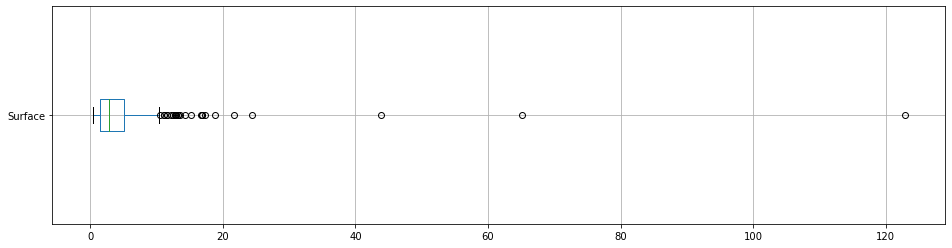

In [11]:
df_surfaces.boxplot(column=['Surface'], vert=False, figsize=(16,4))

In [12]:
s_tombes = tombes.sort_values('Surface')

In [13]:
s_tombes

,IDTombe,Inventaire Tombe,Secteur,Coordonnees_NS,Coordonnees_EW,Altitude sommet,Campagne,Datation,Chapelle associée,Chapelle associée description,...,Peintures,Lit végétal,Coussin végétal,Ocre,Aménagement Description,Nombre de squelettes,Aménagement peau capriné,Coordonnees_EW_Argis,Altitude base,Surface
174,187,00461,3.0,1090.0,308.0,449.0,2011-2012,4.0,0,None,...,0,0,0,0,None,1.0,0,None,428.0,0.3840
171,184,00458,3.0,1095.0,308.0,448.0,2011-2012,4.0,0,None,...,0,0,0,0,None,1.0,0,None,441.0,0.5084
36,45,00344,1.0,1088.0,271.0,542.0,2009-2010,3.0,0,None,...,0,0,0,0,deux enveloppes successives de cuir très fin a...,1.0,1,None,503.0,0.5355
154,167,00441,3.0,1093.0,309.0,465.0,2011-2012,4.0,0,None,...,0,0,0,0,Plusieurs couches de cuir fin ajouré sur les j...,1.0,1,None,408.0,0.5500
159,172,00446,3.0,1088.0,306.0,451.0,2011-2012,4.0,0,None,...,0,0,1,0,Fragments de cuirs fin dans le fond de la foss...,1.0,1,None,431.0,0.5704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,608,00272,1.0,1079.0,264.0,NaN,1998-1999,1.0,0,None,...,0,0,0,0,None,1.0,0,None,NaN,NaN
728,748,00543,26.0,1023.0,242.0,NaN,2013-2014,10.0,0,None,...,0,0,0,0,None,NaN,0,None,NaN,NaN
729,749,Non attribué,11.0,841.0,168.0,NaN,2015-2016,NaN,0,None,...,0,0,0,0,None,NaN,0,None,NaN,NaN
730,750,Non attribué,11.0,839.0,179.0,NaN,2015-2016,NaN,0,None,...,0,0,0,0,None,NaN,0,None,NaN,NaN


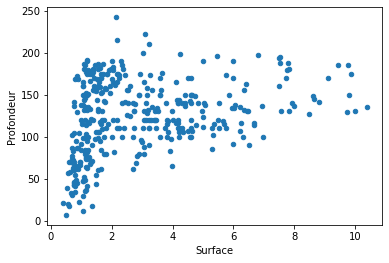

In [14]:
s_tombes_no_outliers = s_tombes[s_tombes['Surface'] < 12]
ax = s_tombes_no_outliers[s_tombes_no_outliers['Surface'] < 12].plot.scatter(x="Surface", y="Profondeur")

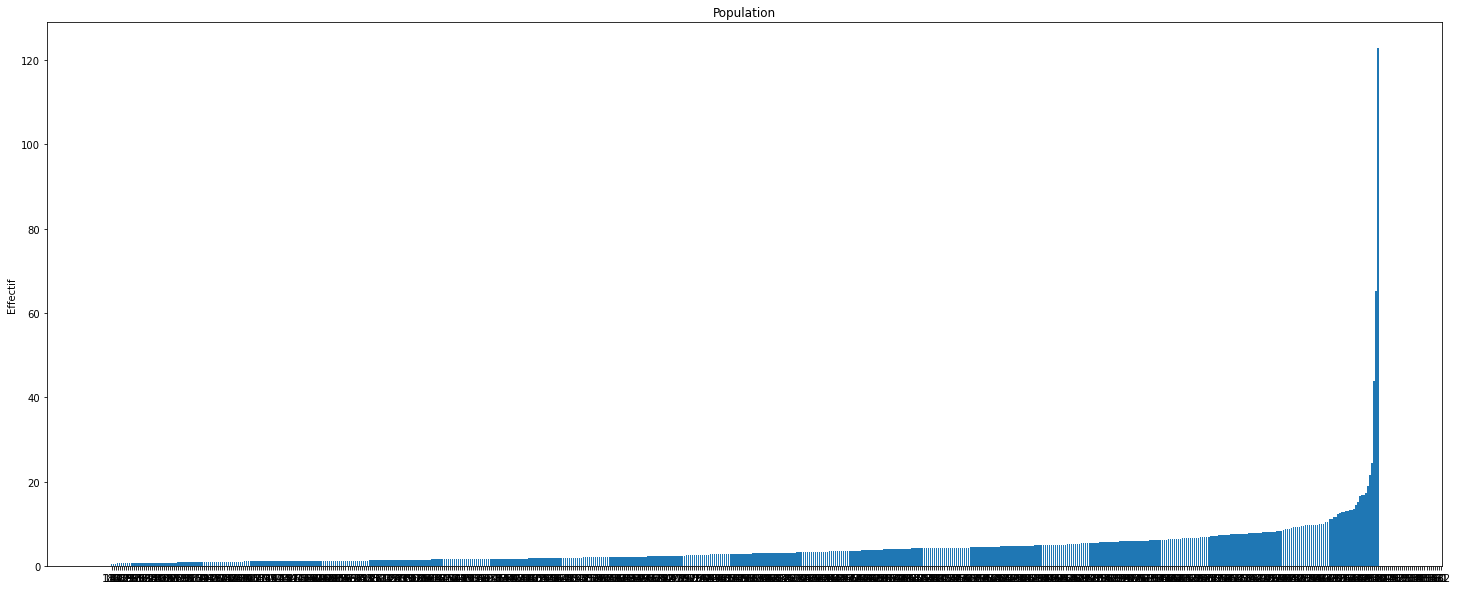

In [15]:
# Population par déparement

# dep = donnees["DEP"]
# eff = donnees["P15_POP"]
# dep = s_donnees["DEP"]
# eff = s_donnees["P15_POP"]
dep = s_tombes["IDTombe"].map(str)
eff = s_tombes["Surface"]

p1 = plt.bar(dep, eff)

# plt.xticks(s_departements["NUMÉRO"].map(str), fontsize=9)
plt.ylabel('Effectif')
plt.title('Population')
plt.gcf().set_size_inches(25, 10)
#plt.gca().axes.get_xaxis().set_visible(False)
# supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz
#plt.savefig('exported_pictures/effectifs_naissances_par_annee.png', dpi=100, bbox_inches = "tight") #pdf, svg
# plt.xticks(rotation=70)
plt.show()


In [16]:
### Inspecter les outliers
s_tombes[s_tombes['Surface'] > 12]

,IDTombe,Inventaire Tombe,Secteur,Coordonnees_NS,Coordonnees_EW,Altitude sommet,Campagne,Datation,Chapelle associée,Chapelle associée description,...,Peintures,Lit végétal,Coussin végétal,Ocre,Aménagement Description,Nombre de squelettes,Aménagement peau capriné,Coordonnees_EW_Argis,Altitude base,Surface
701,721,00591,11.0,842.0,172.0,523.0,2015-2016,12.0,0,None,...,0,0,0,0,None,1.0,0,None,NaN,12.2100
284,301,00656,30.0,967.0,160.0,517.0,2016-2017,NaN,0,None,...,0,0,1,0,Pas de peau de bœuf conservée. Reste de coussi...,1.0,0,None,389.0,12.4916
695,715,00583,11.0,852.0,183.0,513.0,2015-2016,12.0,0,None,...,0,0,0,0,Grand nombre d'ossements humain à part le crân...,1.0,0,None,433.0,12.7440
318,335,00690,30.0,958.0,139.0,505.0,None,NaN,0,None,...,0,0,0,0,None,NaN,0,None,NaN,12.7650
698,718,00586,11.0,852.0,172.0,510.0,2015-2016,12.0,0,None,...,0,0,0,0,Pa de peua inf observées.,2.0,0,None,358.0,12.9500
621,641,00231,26.0,1007.0,202.0,542.0,1996-1997,6.0,0,None,...,0,0,0,0,None,1.0,0,None,399.0,12.9500
706,726,00596,11.0,851.0,165.0,513.0,2015-2016,12.0,0,None,...,0,0,0,0,Min un peau de bœuf. Liséré organique sous les...,1.0,0,None,372.0,13.2600
623,643,00233,26.0,998.0,212.0,525.0,1996-1997,6.0,0,None,...,0,0,0,0,Fragments de vases en albâtre,1.0,0,None,404.0,13.2800
611,630,00212,26.0,955.0,200.0,535.0,1995-1996,6.0,0,None,...,0,0,0,0,None,4.0,0,None,376.0,13.5675
657,677,00557,26.0,1014.0,224.0,NaN,2013-2014,NaN,0,None,...,0,0,0,0,2 peaux supérieures,1.0,0,None,NaN,14.3220


In [16]:
mesures_tombes = s_tombes_no_outliers[['IDTombe', 'Secteur', 'Surface', 'Profondeur']]

In [17]:
secteurs_groupes = mesures_tombes.groupby('Secteur', axis = 'columns')  #.agg(lambda x : ','.join(x))

In [18]:
secteurs_groupes

In [19]:
### Doc.
#  https://stackoverflow.com/questions/55412732/group-row-values-as-columns-in-pandas
# T pour 'tombeau générique', non un identifiant précis
mesures_tombes['col'] = 'T' + (mesures_tombes.groupby('Secteur').IDTombe.cumcount() + 1).astype(str)

<ipython-input-19-ce8c43e0acc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mesures_tombes['col'] = 'T' + (mesures_tombes.groupby('Secteur').IDTombe.cumcount() + 1).astype(str)


In [20]:
s_tombes_no_outliers

,IDTombe,Inventaire Tombe,Secteur,Coordonnees_NS,Coordonnees_EW,Altitude sommet,Campagne,Datation,Chapelle associée,Chapelle associée description,...,Peintures,Lit végétal,Coussin végétal,Ocre,Aménagement Description,Nombre de squelettes,Aménagement peau capriné,Coordonnees_EW_Argis,Altitude base,Surface
174,187,00461,3.0,1090.0,308.0,449.0,2011-2012,4.0,0,None,...,0,0,0,0,None,1.0,0,None,428.0,0.3840
171,184,00458,3.0,1095.0,308.0,448.0,2011-2012,4.0,0,None,...,0,0,0,0,None,1.0,0,None,441.0,0.5084
36,45,00344,1.0,1088.0,271.0,542.0,2009-2010,3.0,0,None,...,0,0,0,0,deux enveloppes successives de cuir très fin a...,1.0,1,None,503.0,0.5355
154,167,00441,3.0,1093.0,309.0,465.0,2011-2012,4.0,0,None,...,0,0,0,0,Plusieurs couches de cuir fin ajouré sur les j...,1.0,1,None,408.0,0.5500
159,172,00446,3.0,1088.0,306.0,451.0,2011-2012,4.0,0,None,...,0,0,1,0,Fragments de cuirs fin dans le fond de la foss...,1.0,1,None,431.0,0.5704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,632,00221,26.0,998.0,234.0,522.0,1995-1996,6.0,0,None,...,0,0,0,0,None,1.0,0,None,417.0,10.4400
610,629,00211,26.0,959.0,205.0,536.0,1995-1996,6.0,0,None,...,0,0,0,0,None,1.0,0,None,363.0,11.0466
278,295,00649,30.0,960.0,169.0,517.0,2016-2017,NaN,0,None,...,0,0,0,0,Un morecau de peau de bœuf inférieur. Un peu d...,1.0,0,None,392.0,11.1000
710,730,00600,11.0,843.0,162.0,519.0,2015-2016,12.0,0,None,...,0,0,0,0,None,1.0,0,None,NaN,11.5500


In [21]:
df_new = mesures_tombes.pivot(index='Secteur', columns='col', values='Surface')

In [22]:
tdf_new = df_new.T
tdf_new.columns

Float64Index([ 1.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0,
              26.0, 30.0, 32.0, 33.0],
             dtype='float64', name='Secteur')

In [23]:
tdf_new = tdf_new.set_axis([str(int(c)) for c in tdf_new], axis=1)
type(tdf_new)

pandas.core.frame.DataFrame

In [24]:
tdf_new.reindex()

,1,3,4,5,6,7,8,9,10,11,12,26,30,32,33
col,,,,,,,,,,,,,,,
T1,0.5355,0.3840,0.8400,1.9035,3.157,1.62,3.01,1.6638,1.8,1.69,2.72,0.7347,0.8715,2.1996,0.76
T10,0.8740,0.6804,1.8125,NaN,NaN,NaN,NaN,NaN,NaN,3.96,NaN,1.6530,3.4200,NaN,1.74
T100,1.9500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8000,NaN,NaN,7.56
T101,1.9680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0000,NaN,NaN,7.82
T102,2.0125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2800,NaN,NaN,7.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T95,1.8480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5225,NaN,NaN,6.44
T96,1.8480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5350,NaN,NaN,6.48
T97,1.9200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6800,NaN,NaN,6.51


In [25]:
lengths = []
for c in tdf_new.columns:
    lengths.append(len(tdf_new[c].dropna()))

<AxesSubplot:>

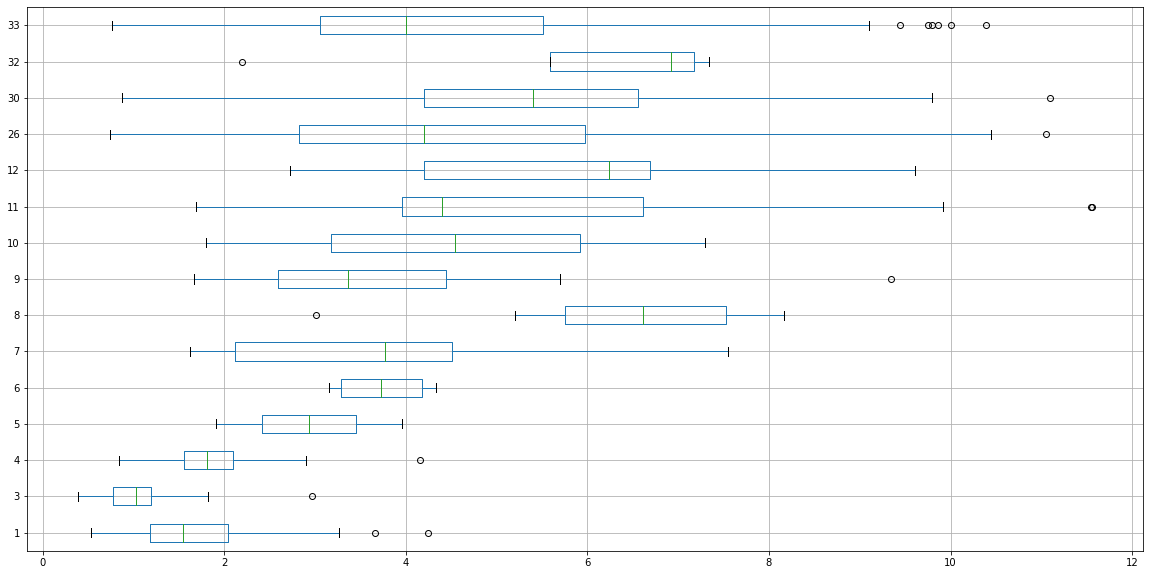

In [26]:
tdf_new.boxplot(vert=False, figsize=(20,10))

In [27]:
labels = [i[0] for i in tdf_new.columns]
len(labels), len(lengths)

(15, 15)

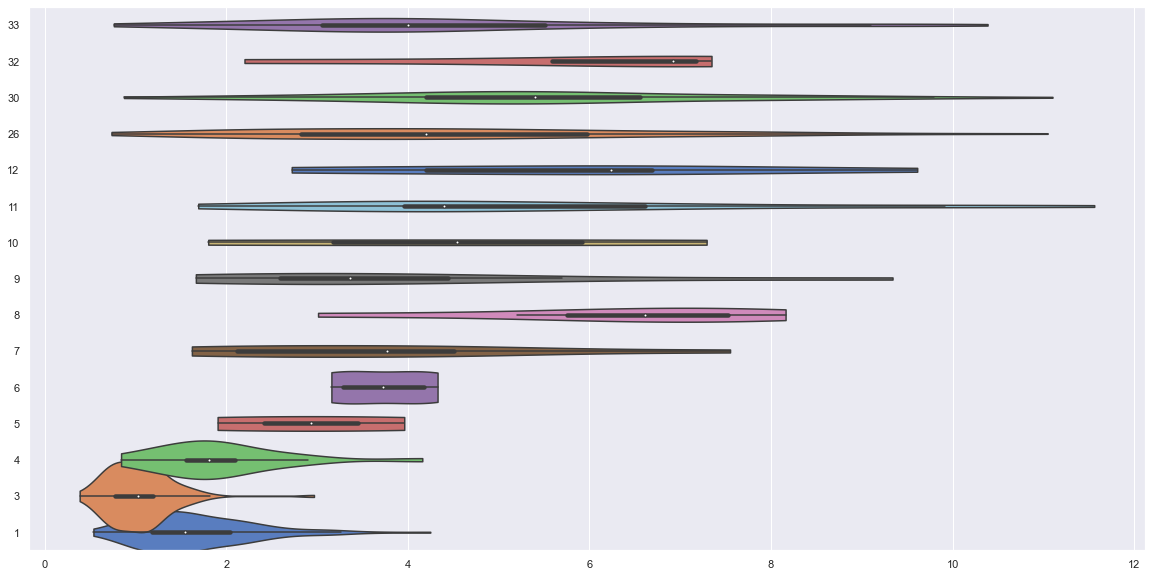

In [28]:
sns.set(rc={"figure.figsize":(20, 10)})
ax = sns.violinplot(data=tdf_new, width=2, palette="muted", orient='h', cut=0); # 
ax.invert_yaxis()

In [29]:
### doc
# https://www.datasciencemadesimple.com/group-by-count-in-pandas-dataframe-python-2/
sect_grouped = s_tombes_no_outliers.groupby(['Secteur'])['Surface'].count().reset_index()
sect_grouped['min_surface'] = s_tombes_no_outliers.groupby(['Secteur'])['Surface'].min().reset_index()['Surface']
sect_grouped['median_surface'] = s_tombes_no_outliers.groupby(['Secteur'])['Surface'].median().reset_index()['Surface']
sect_grouped['max_Surface'] = s_tombes_no_outliers.groupby(['Secteur'])['Surface'].max().reset_index()['Surface']
sect_grouped

,Secteur,Surface,min_surface,median_surface,max_Surface
0,1.0,140,0.5355,1.54000,4.2460
1,3.0,88,0.3840,1.02825,2.9648
2,4.0,21,0.8400,1.81250,4.1580
3,5.0,2,1.9035,2.93135,3.9592
4,6.0,4,3.1570,3.72360,4.3262
5,7.0,8,1.6200,3.76450,7.5484
6,8.0,7,3.0100,6.61500,8.1600
7,9.0,8,1.6638,3.35755,9.3380
8,10.0,2,1.8000,4.54500,7.2900
9,11.0,35,1.6900,4.40000,11.5600


In [31]:
### https://www.stackabuse.com/how-to-iterate-over-rows-in-a-pandas-dataframe/

for col_name, data in tdf_new.items():
    print("Sector:",col_name, "\nvalues:",data.describe())

Sector: 1 
values: count    140.000000
mean       1.657668
std        0.646867
min        0.535500
25%        1.179150
50%        1.540000
75%        2.040000
max        4.246000
Name: 1, dtype: float64
Sector: 3 
values: count    88.000000
mean      1.035847
std       0.360577
min       0.384000
25%       0.773050
50%       1.028250
75%       1.194600
max       2.964800
Name: 3, dtype: float64
Sector: 4 
values: count    21.000000
mean      1.926505
std       0.728790
min       0.840000
25%       1.552500
50%       1.812500
75%       2.100000
max       4.158000
Name: 4, dtype: float64
Sector: 5 
values: count    2.000000
mean     2.931350
std      1.453599
min      1.903500
25%      2.417425
50%      2.931350
75%      3.445275
max      3.959200
Name: 5, dtype: float64
Sector: 6 
values: count    4.00000
mean     3.73260
std      0.57717
min      3.15700
25%      3.28405
50%      3.72360
75%      4.17215
max      4.32620
Name: 6, dtype: float64
Sector: 7 
values: count    8.000000
mean